# Load datasets

In [1]:
import pandas as pd

df_day = pd.read_csv('day.csv')
df_hour = pd.read_csv('hour.csv')

#notes: only df_hour will be used here

# Data preview

In [2]:
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [3]:
df_hour.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [4]:
df_hour.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

# Drop irrelevant features

In [5]:
df_hour = df_hour.drop(['instant', 'dteday', 'holiday', 'weekday'], axis=1)

# Visualization library

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Features correlation

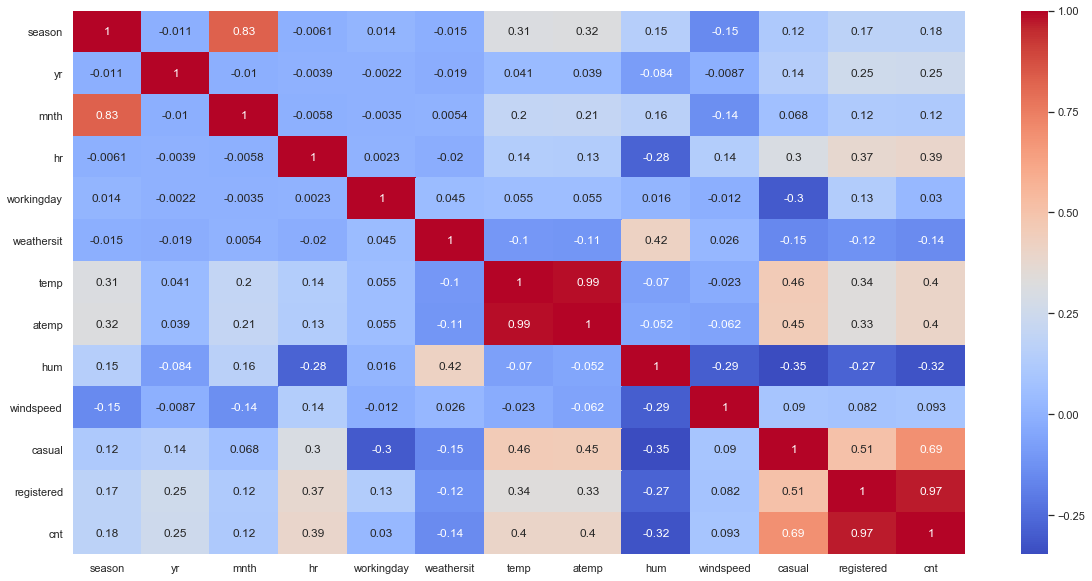

In [7]:
# Finding the relations between the variables.

sns.set(color_codes=True)

fig, ax = plt.subplots(figsize=(20,10))
data_analysis = df_hour.corr()
sns.heatmap(data_analysis,cmap='coolwarm',annot=True)
bottom, top = ax.get_ylim()
#code for border correction (problem in matplotlib 3.1.1, update or downgrade yours if want to solve the problem)
ax.set_ylim(bottom+0.5, top-0.5)

plt.show()

# Exploratory Data Analysis

## Rental vs Season

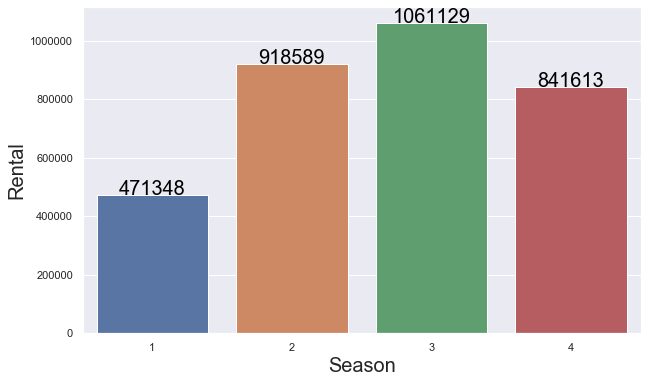

In [8]:
fig = plt.figure(figsize=(10,6))

sns.set()

groupedvalues=df_hour.groupby('season')['cnt'].sum().reset_index()
barplot1=sns.barplot(x='season',y='cnt',data=groupedvalues)

for index, row in groupedvalues.iterrows():
    barplot1.text(row.season-1,row.cnt, round(row.cnt,1), color='black', ha="center", size=20)
    
plt.xlabel("Season", fontsize=20)
plt.ylabel("Rental", fontsize=20)

plt.show()


## Rental vs Season (year comparison)

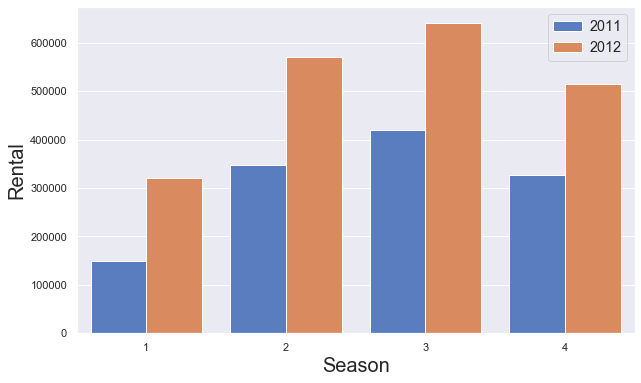

<Figure size 477.725x432 with 0 Axes>

In [9]:
fig, ax= plt.subplots(figsize=(10,6))

sns.set()

groupedvalues2=df_hour.groupby(['yr','season'])['cnt'].sum().reset_index() 

sns.catplot(x="season", y="cnt", hue="yr", data=groupedvalues2, height=6, kind="bar", palette="muted", ax=ax)

ax.set_xlabel("Season", fontsize=20)
ax.set_ylabel("Rental", fontsize=20)

# Fix the legend
handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles[0:2], ['2011','2012'],
               loc='upper right',
               fontsize='large',
               handletextpad=0.5
               )
lgd.legendHandles[0]._sizes = [40]
lgd.legendHandles[1]._sizes = [40]

#removing unknown misconfiguration in matplotlib
plt.delaxes()

## Rental vs Month (Total)

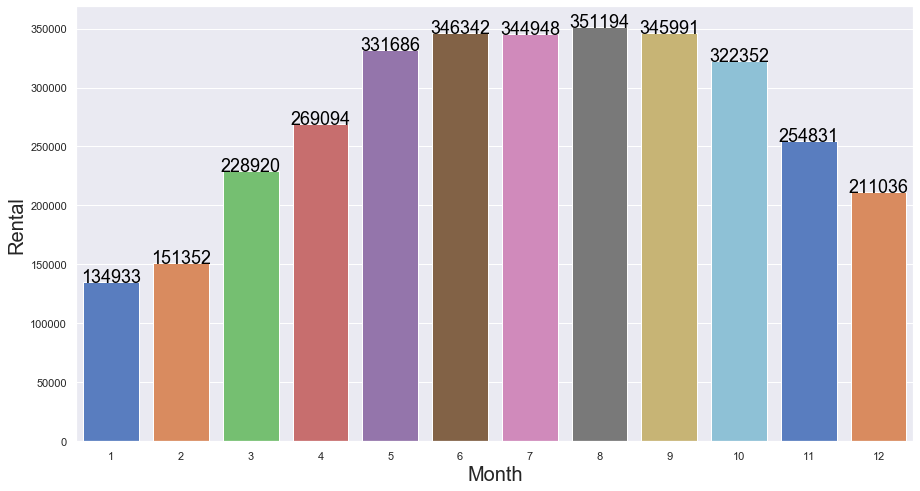

In [10]:
fig_dims = (15, 8)
fig, ax = plt.subplots(figsize=fig_dims)

groupedvalues=df_hour.groupby('mnth')['cnt'].sum().reset_index()
barplot1=sns.barplot(x='mnth',y='cnt', data=groupedvalues, ax=ax, palette="muted")

for index, row in groupedvalues.iterrows():
    barplot1.text(row.mnth-1,row.cnt, round(row.cnt,1), color='black', ha="center", size=18)
    
plt.xlabel("Month", fontsize=20)
plt.ylabel("Rental", fontsize=20)

plt.show()

## Rental vs Month (Year comparison)

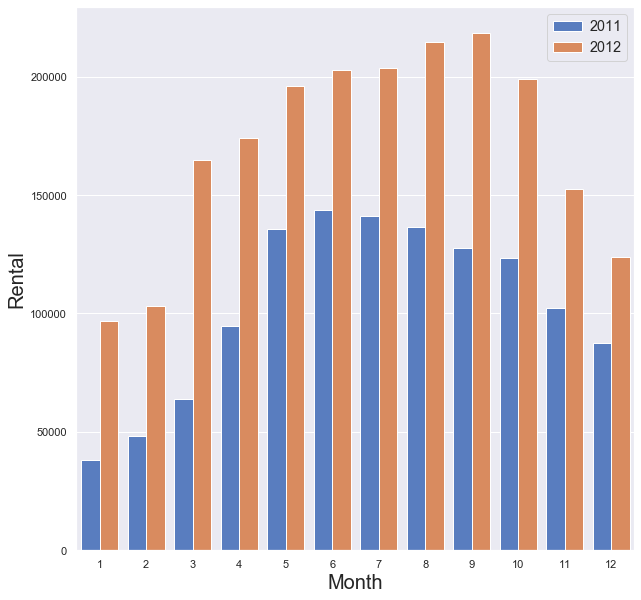

<Figure size 621.725x576 with 0 Axes>

In [11]:
fig_dims = (10, 10)
fig, ax = plt.subplots(figsize=fig_dims)

sns.set()

groupedvalues2=df_hour.groupby(['yr','mnth'])['cnt'].sum().reset_index()    
sns.catplot(x='mnth', y='cnt', hue='yr', data=groupedvalues2, kind="bar", palette="muted", height=8, ax=ax)

ax.set_xlabel("Month", fontsize=20)
ax.set_ylabel("Rental", fontsize=20)

# Fix the legend
handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles[0:2], ['2011','2012'],
               loc='upper right',
               fontsize='large',
               handletextpad=0.5)

lgd.legendHandles[0]._sizes = [5]
lgd.legendHandles[1]._sizes = [5]

#removing unknown misconfiguration in matplotlib
plt.delaxes()

## Month vs Rental (Classified by weather situation)

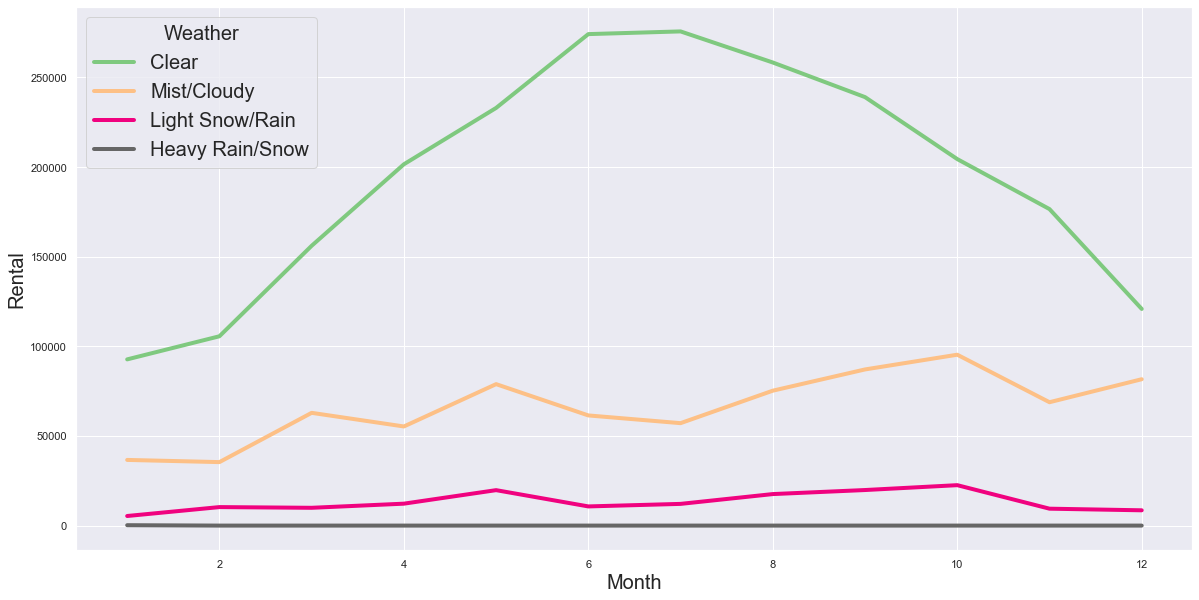

In [12]:
fig_dims = (20, 10)
fig = plt.subplots(figsize=fig_dims)

groupedvalues=df_hour.pivot_table(index='weathersit', columns='mnth', values='cnt', fill_value=0, aggfunc='sum').unstack().to_frame().rename(columns={0:'cnt'})

sns.lineplot(x=groupedvalues.index.get_level_values(0), y="cnt", hue=groupedvalues.index.get_level_values(1), estimator=None, lw=4,
                    data=groupedvalues, palette="Accent")

plt.legend(title="Weather", title_fontsize=20, fontsize=20, labels=('Clear','Mist/Cloudy','Light Snow/Rain','Heavy Rain/Snow') )
plt.xlabel("Month", fontsize=20)
plt.ylabel("Rental", fontsize=20)

plt.show()

## Temperature vs Rental

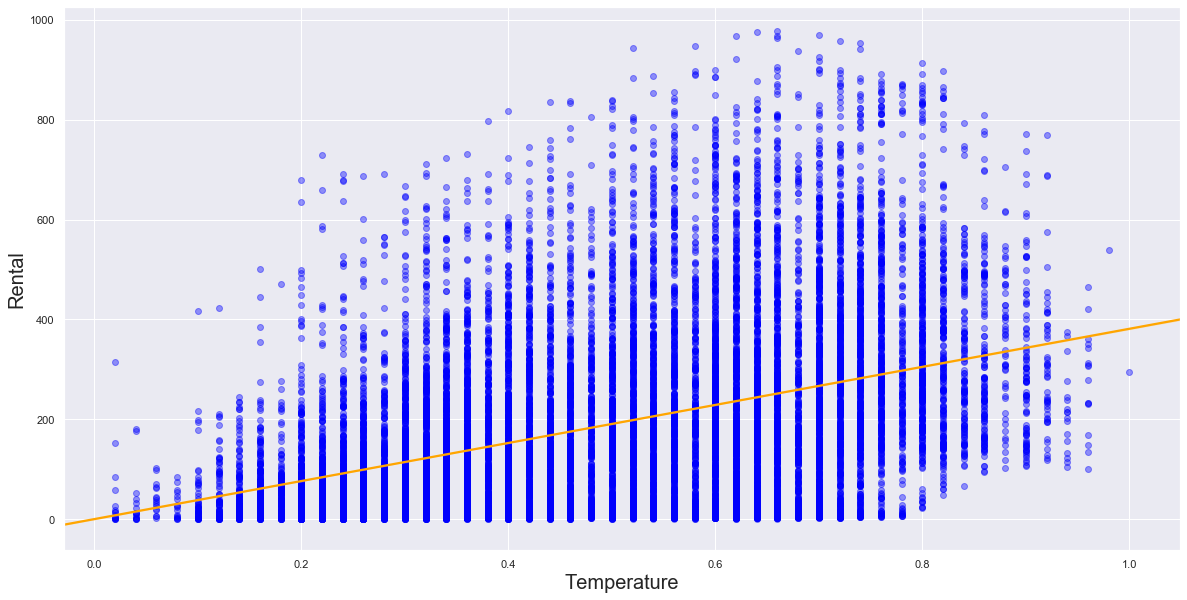

In [13]:
fig_dims = (20, 10)
plt.figure(figsize=fig_dims)

sns.set()
sns.regplot(x='temp', y='cnt', data=df_hour, ci=50, scatter_kws={'color':'blue', 'alpha':0.4}, line_kws={'color':"orange"})

plt.xlabel("Temperature", fontsize=20)
plt.ylabel("Rental", fontsize=20)

plt.show()

## Temperature vs Rental

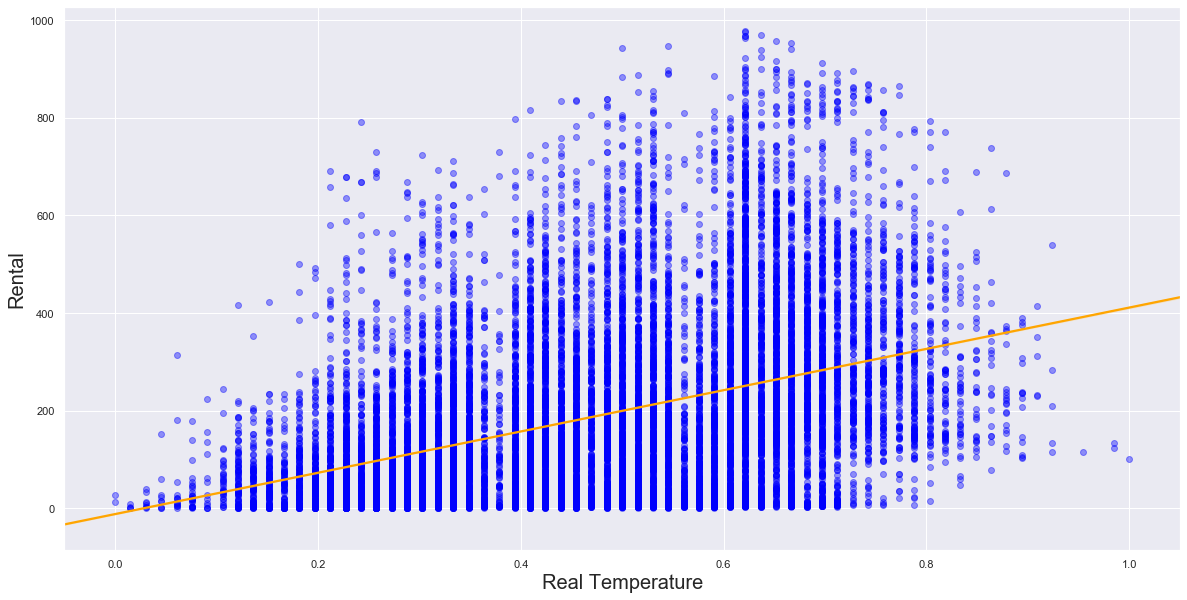

In [14]:
fig_dims = (20, 10)
plt.figure(figsize=fig_dims)

sns.set()
sns.regplot(x='atemp', y='cnt', data=df_hour, ci=50, scatter_kws={'color':'blue', 'alpha':0.4}, line_kws={'color':"orange"})

plt.xlabel("Real Temperature", fontsize=20)
plt.ylabel("Rental", fontsize=20)

plt.show()

## Humidity vs Rental

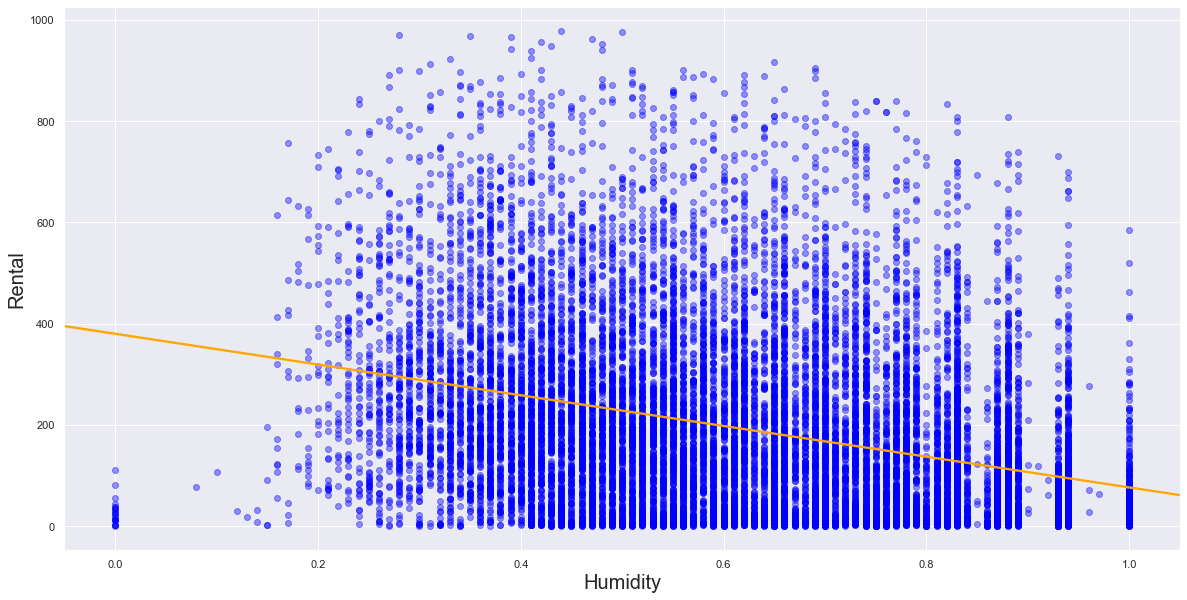

In [15]:
fig_dims = (20, 10)
plt.figure(figsize=fig_dims)

sns.set()
sns.regplot(x='hum', y='cnt', data=df_hour, ci=50, scatter_kws={'color':'blue', 'alpha':0.4}, line_kws={'color':"orange"})

plt.xlabel("Humidity", fontsize=20)
plt.ylabel("Rental", fontsize=20)

plt.show()

## Wind speed vs Rental

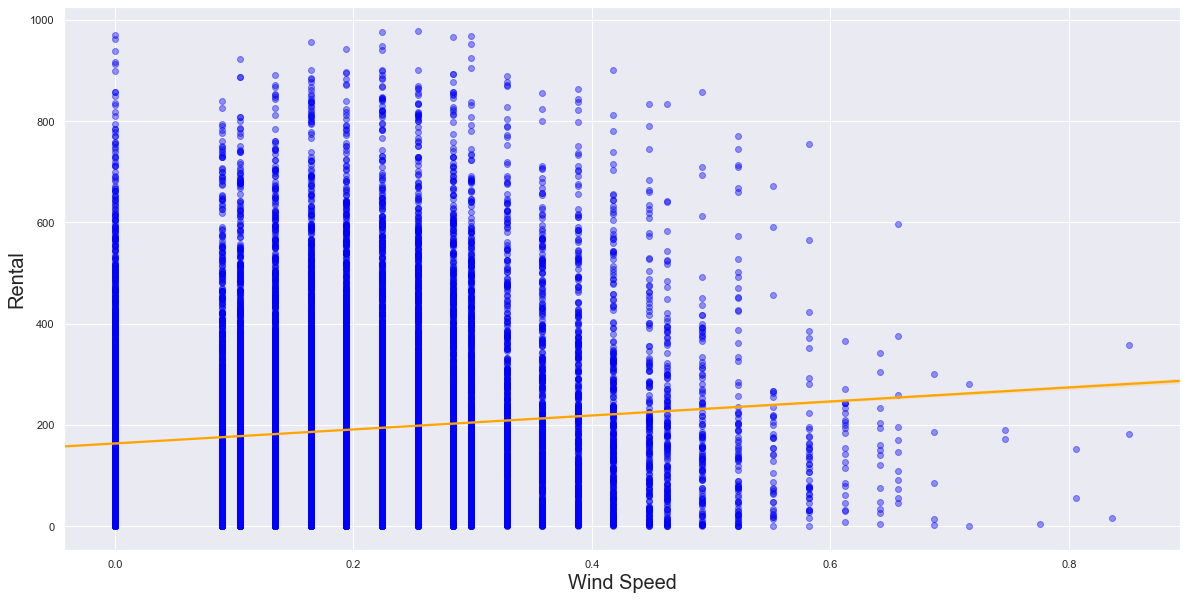

In [16]:
fig_dims = (20, 10)
plt.figure(figsize=fig_dims)

sns.set()
sns.regplot(x='windspeed', y='cnt', data=df_hour, ci=50, scatter_kws={'color':'blue', 'alpha':0.4}, line_kws={'color':"orange"})

plt.xlabel("Wind Speed", fontsize=20)
plt.ylabel("Rental", fontsize=20)

plt.show()

# Weather situation vs Registered Users

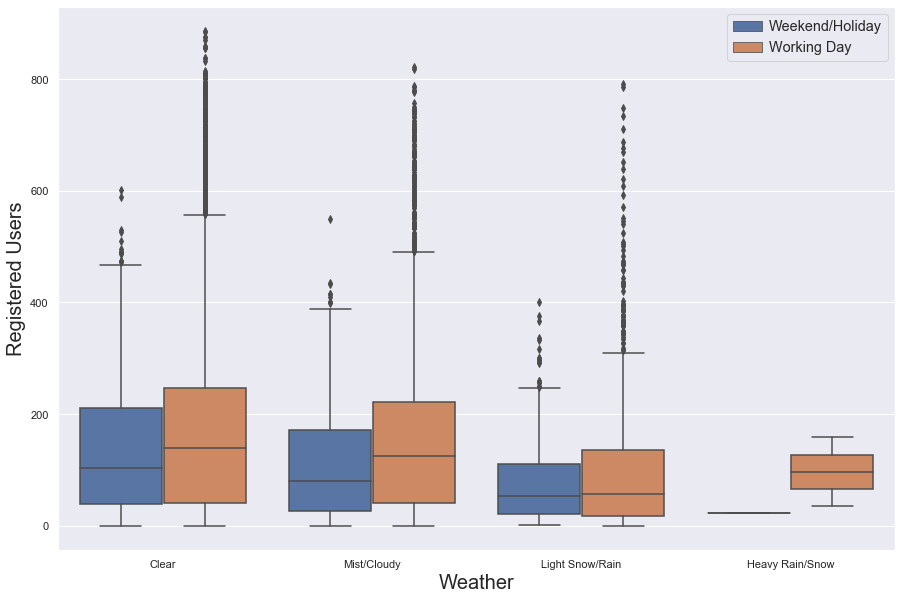

In [17]:
fig,ax = plt.subplots(figsize=(15,10))

sns.boxplot(x=df_hour['weathersit'], y=df_hour['registered'], hue=df_hour['workingday'])

plt.xticks([0, 1, 2, 3], ['Clear','Mist/Cloudy','Light Snow/Rain','Heavy Rain/Snow'])
plt.xlabel("Weather", fontsize=20)
plt.ylabel("Registered Users", fontsize=20)

# Fix the legend
handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles[0:2], ['Weekend/Holiday','Working Day'],
               loc='upper right',
               fontsize='large',
               handletextpad=0.5)
lgd.legendHandles[0]._sizes = [40]
lgd.legendHandles[1]._sizes = [40]

plt.show()

# Weather situation vs Casual Users

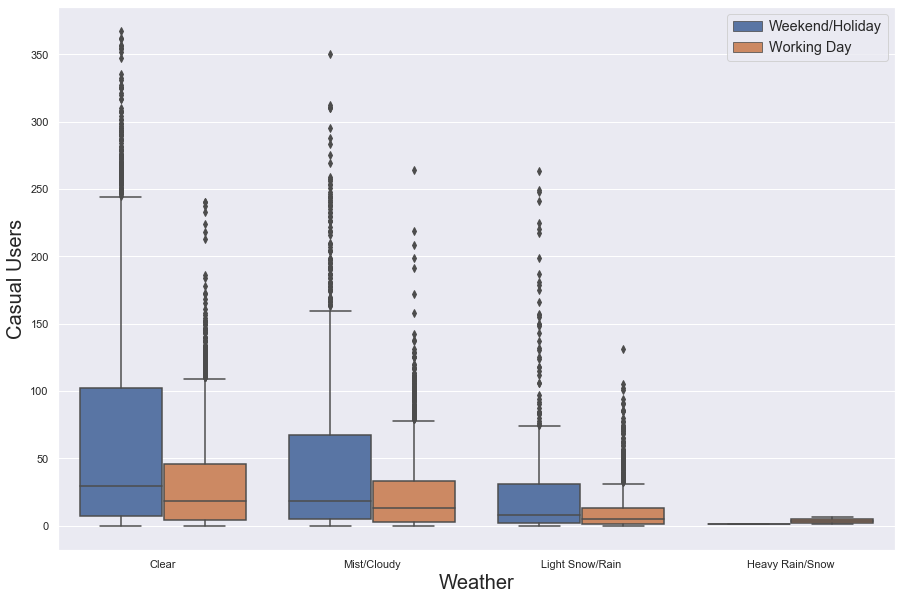

In [18]:
fig,ax = plt.subplots(figsize=(15,10))

sns.boxplot(x=df_hour['weathersit'], y=df_hour['casual'], hue=df_hour['workingday'])

plt.xticks([0, 1, 2, 3], ['Clear','Mist/Cloudy','Light Snow/Rain','Heavy Rain/Snow'])
plt.xlabel("Weather", fontsize=20)
plt.ylabel("Casual Users", fontsize=20)

# Fix the legend
handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles[0:2], ['Weekend/Holiday','Working Day'],
               loc='upper right',
               fontsize='large',
               handletextpad=0.5)
lgd.legendHandles[0]._sizes = [40]
lgd.legendHandles[1]._sizes = [40]

plt.show()

# Timeseries Analysis

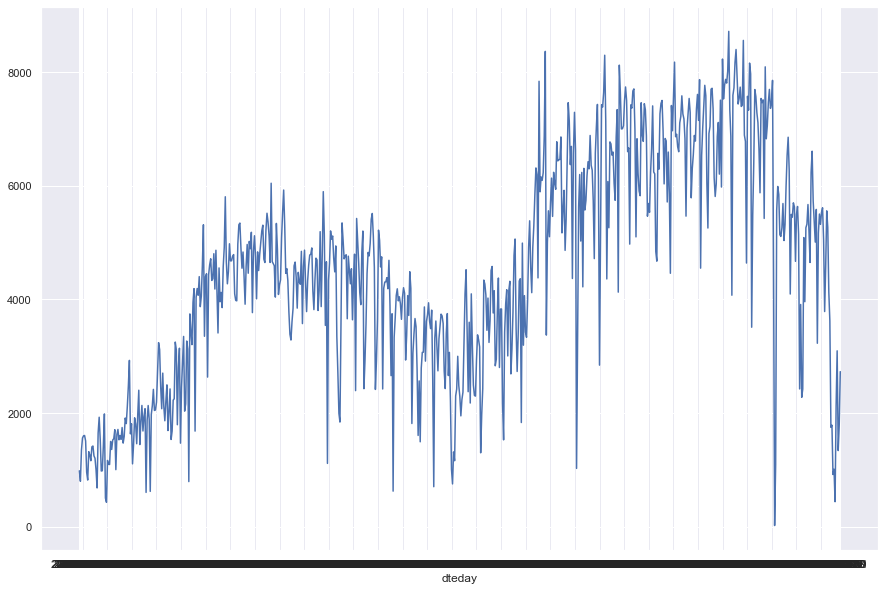

In [19]:
fig, ax = plt.subplots(figsize=(15,10))

#Need to reload the dataset because want to extract date data (dropped in analyzed data)
df_tshour = pd.read_csv('hour.csv')

#plotting summary per day
df_daily = df_tshour.groupby(['dteday'])['cnt'].sum()

sns.set()

ax = sns.lineplot(df_daily.index, df_daily.values)

plt.show()

# Machine Learning Regression

In [20]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model
from sklearn import svm
from sklearn import neural_network
import time

#time counter
start_time = time.time()

#Features selection
#X = df_hour[['mnth', 'hr', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed']]
X = df_hour[['mnth', 'hr', 'workingday', 'weathersit', 'atemp', 'hum']]

#Divide into casual, registered, on total users dataset

#Dataset for casual users
X_train_cas, X_test_cas, y_train_cas, y_test_cas = train_test_split(X, df_hour['casual'], test_size=0.2, shuffle=False)
#Dataset for registered users
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, df_hour['registered'], test_size=0.2, shuffle=False)
#Dataset for total users
X_train_cnt, X_test_cnt, y_train_cnt, y_test_cnt = train_test_split(X, df_hour['cnt'], test_size=0.2, shuffle=False)

model1 = RandomForestRegressor()
model2 = RandomForestRegressor()
model3 = RandomForestRegressor()
model4 = RandomForestRegressor()

#============================================#
#Testing other models
#model = linear_model.LinearRegression()
#model = linear_model.Ridge(alpha=.5)
#model = linear_model.BayesianRidge()
#model = linear_model.LogisticRegression()
#model = linear_model.SGDRegressor()
#model = svm.SVR()
#model = neural_network.MLPRegressor()
#============================================#

print('Dataset shapes:')
print('Training features: ', X_train_cas.shape)
print('Training labels: ', y_train_cas.shape)
print('Test features: ', X_test_cas.shape)
print('Test labels: ', y_test_cas.shape)
print('')
print('Model: ', model1)

#Fitting model on casual dataset
model1.fit(X_train_cas, y_train_cas)
#Fitting model on registered dataset
model2.fit(X_train_reg, y_train_reg)

#Evaluation function
def evaluate(predictions, test_labels):    
    errors = np.absolute(predictions['mod']-test_labels)
    mad = np.mean(errors)
    mape = 100 * np.mean(errors+1 / (test_labels+1))
    accuracy = 100 - mape
    mse = np.mean(np.power(errors, 2))
    print('=================================================================')
    print('Evaluation')
    print('Model Performance')
    print('Model case: {:s}'.format(predictions['mod_name']))
    print('Mean Absolute Deviation: {:0.4f}'.format(mad))
    print('Mean Square Error = {:0.2f}'.format(mse))
    print('Accuracy = {:0.2f}%'.format(accuracy))

#Predicting casual data
pred_cas = {}
pred_cas['mod'] = model1.predict(X_test_cas)
pred_cas['mod_name'] = str(model1).split('(')[0]+' (cas data only)'
#Predicting registered data
pred_reg = {}
pred_reg['mod'] = model2.predict(X_test_reg)
pred_reg['mod_name'] = str(model2).split('(')[0]+' (reg only)'
#Summing up casual and registered data
pred_cnt = {}
pred_cnt['mod'] = pred_cas['mod'] + pred_reg['mod']
pred_cnt['mod_name'] = str(model3).split('(')[0]+' (cnt summed up)'

#============================================#
#To compare with direct regression with cnt data
model4.fit(X_train_cnt, y_train_cnt)
pred_cnt2 = {}
pred_cnt2['mod'] = model4.predict(X_test_cnt)
pred_cnt2['mod_name'] = str(model4).split('(')[0]+' (cnt direct prediction)'
#============================================#

evaluate(pred_cas, y_test_cas)
evaluate(pred_reg, y_test_reg)
evaluate(pred_cnt, y_test_cnt)
#Testing direct cnt data to build the model
evaluate(pred_cnt2, y_test_cnt)

print('')
end_time = time.time()
print('Time execution = {:0.2f}s'.format(end_time - start_time))

Dataset shapes:
Training features:  (13903, 6)
Training labels:  (13903,)
Test features:  (3476, 6)
Test labels:  (3476,)

Model:  RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators='warn',
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)


/Users/hardanimaulana/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/hardanimaulana/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/hardanimaulana/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Evaluation
Model Performance
Model case: RandomForestRegressor (cas data only)
Mean Absolute Deviation: 15.3575
Mean Square Error = 807.09
Accuracy = -1452.24%
Evaluation
Model Performance
Model case: RandomForestRegressor (reg only)
Mean Absolute Deviation: 78.2214
Mean Square Error = 12982.14
Accuracy = -7725.05%
Evaluation
Model Performance
Model case: RandomForestRegressor (cnt summed up)
Mean Absolute Deviation: 89.6854
Mean Square Error = 16720.53
Accuracy = -8871.06%
Evaluation
Model Performance
Model case: RandomForestRegressor (cnt direct prediction)
Mean Absolute Deviation: 90.5860
Mean Square Error = 16919.92
Accuracy = -8961.11%

Time execution = 0.85s


# Prediction visualization

## Daily prediction

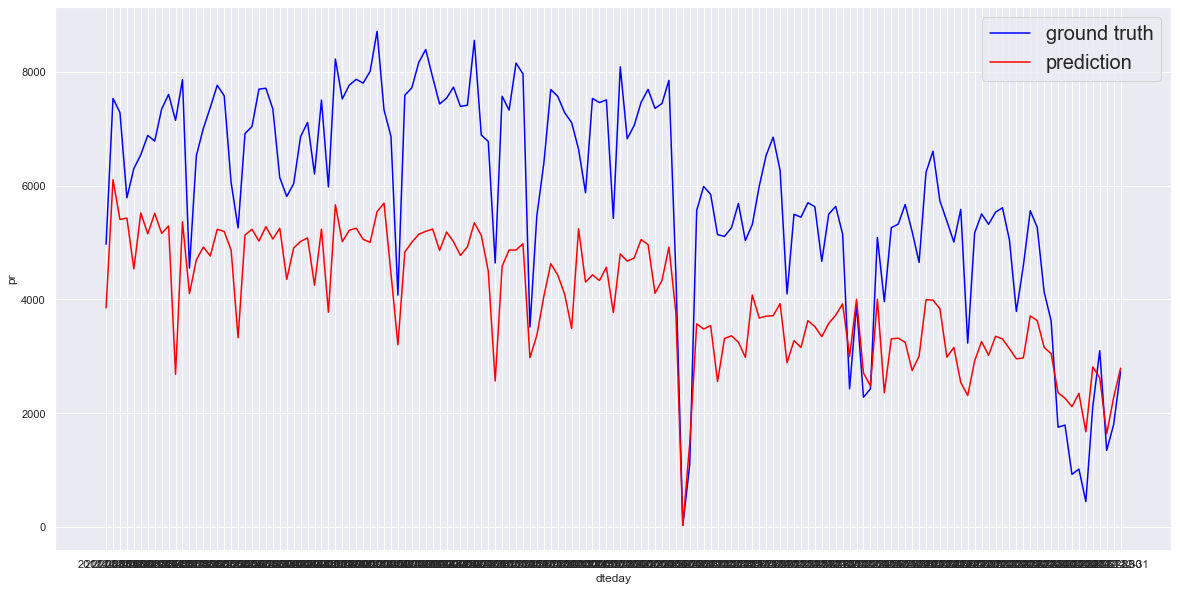

In [21]:
date = df_tshour['dteday'][-len(pred_cnt['mod']):]

pred = pd.DataFrame(date)
pred['gt'] = y_test_cnt
pred['pr'] = pred_cnt['mod']

gt_daily = pred.groupby(['dteday'])['gt'].sum().reset_index()
pred_daily = pred.groupby(['dteday'])['pr'].sum().reset_index()

fig, ax = plt.subplots(figsize=(20,10))

sns.set()

ax = sns.lineplot(x='dteday', y='gt', data = gt_daily, color='blue')
ax = sns.lineplot(x='dteday', y='pr', data = pred_daily, color='red')

plt.legend(fontsize=20, labels=('ground truth', 'prediction'))

plt.show()

## Hourly prediction

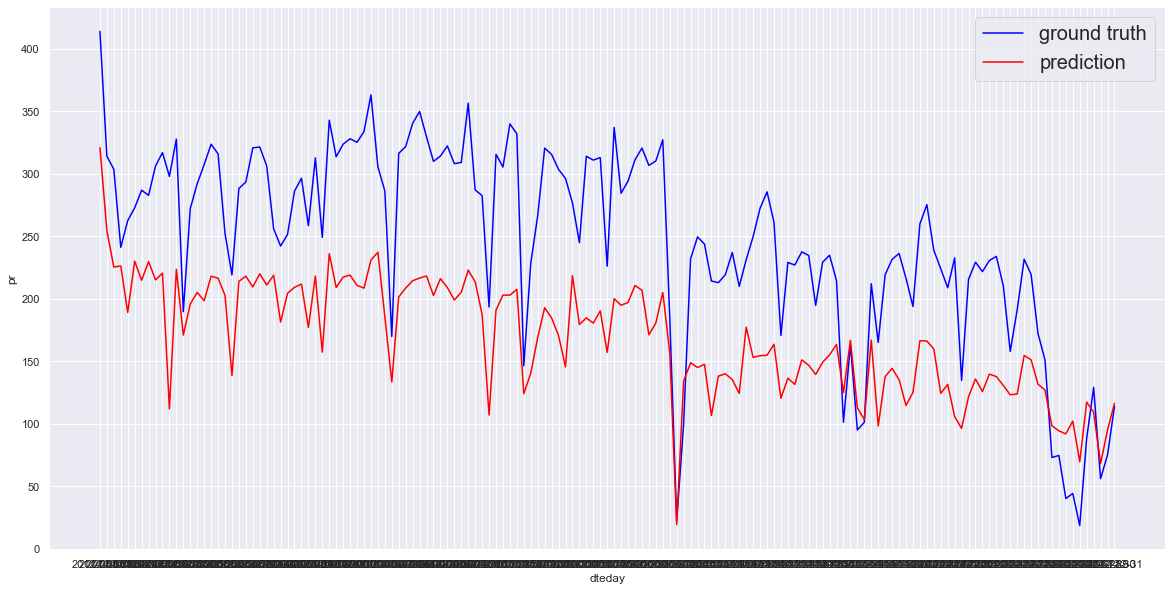

In [22]:
fig, ax = plt.subplots(figsize=(20,10))

sns.set()

ax = sns.lineplot(x='dteday', y='gt', data = pred, color='blue', ci=None)
ax = sns.lineplot(x='dteday', y='pr', data = pred, color='red', ci=None)

plt.legend(fontsize=20, labels=('ground truth', 'prediction'))

plt.show()

## Daily Prediction With Complete Dataset

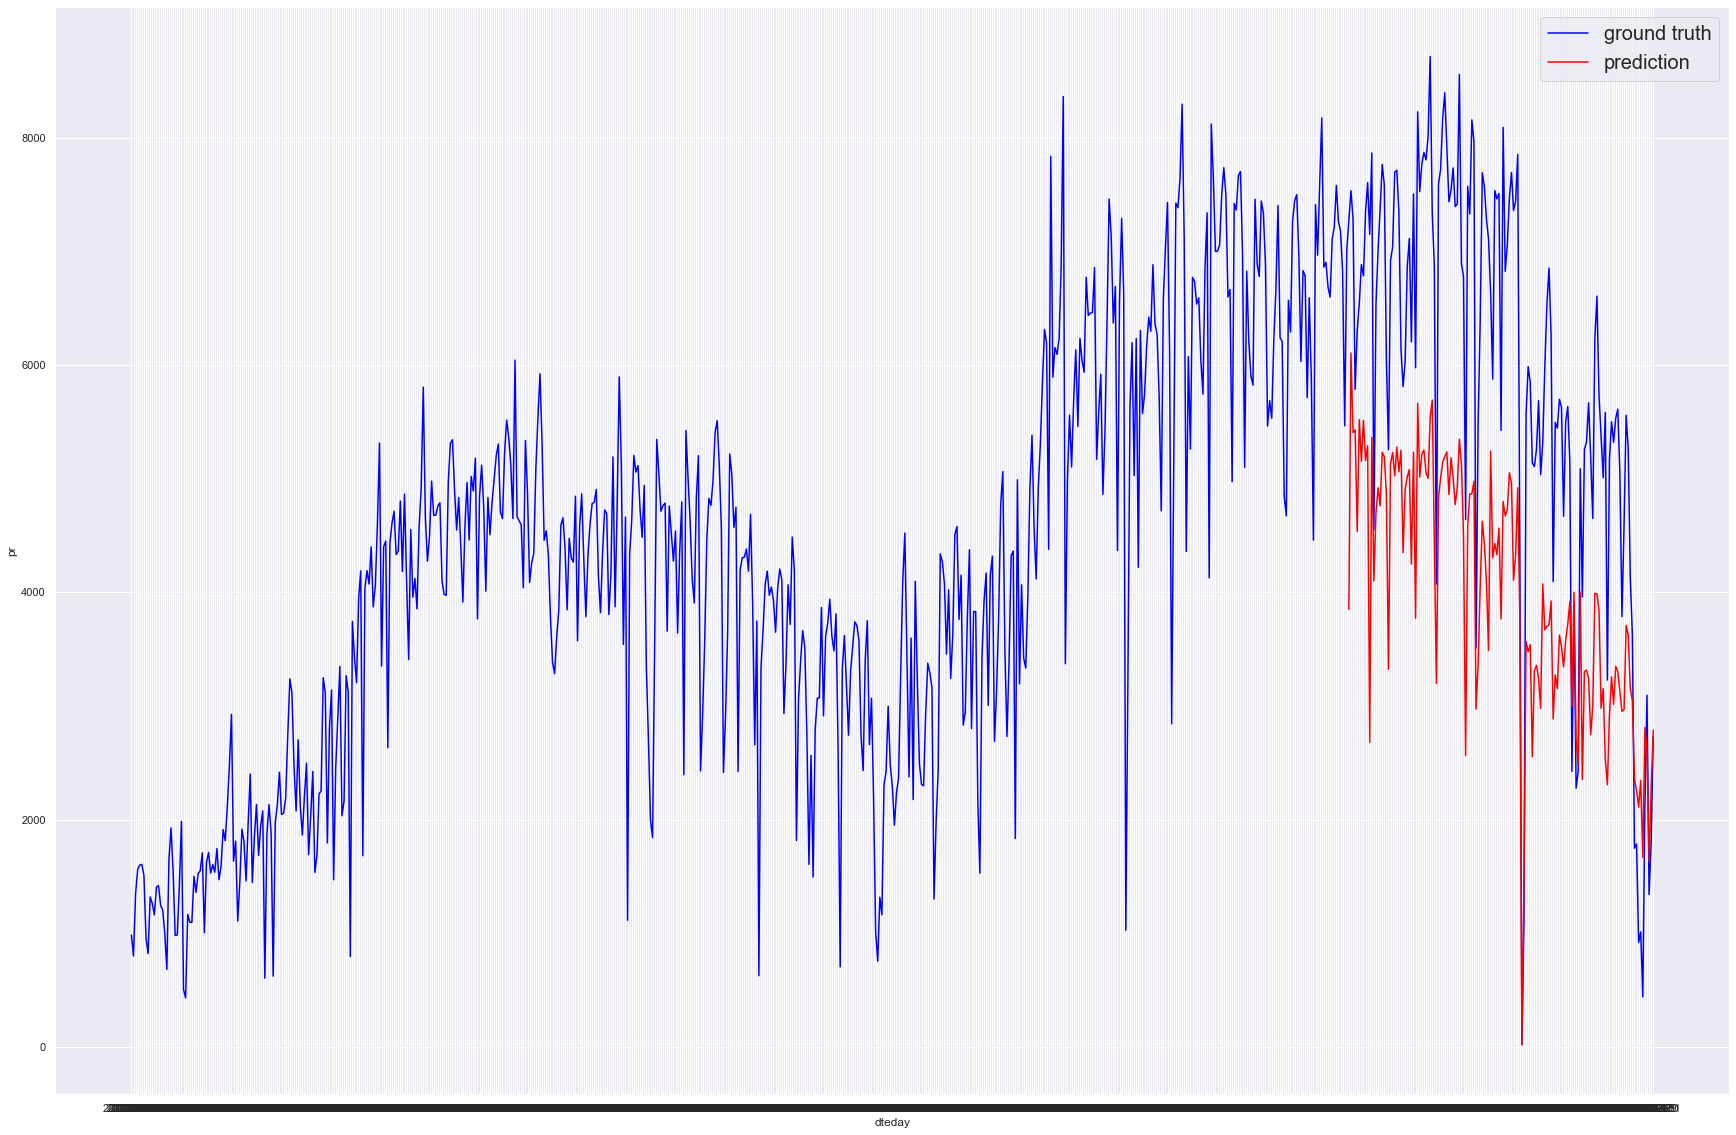

In [23]:
date = df_tshour['dteday']
pred_date = df_tshour['dteday'][-len(pred_cnt['mod']):]

gt_data = pd.DataFrame(date)
gt_data['gt'] = df_tshour['cnt']

pred_data = pd.DataFrame(pred_date)
pred_data['pr'] = pred_cnt['mod']

gt_daily = gt_data.groupby(['dteday'])['gt'].sum().reset_index()
pred_daily = pred_data.groupby(['dteday'])['pr'].sum().reset_index()

fig, ax = plt.subplots(figsize=(30,20))

sns.set()

ax = sns.lineplot(x='dteday', y='gt', data = gt_daily, color='blue')
ax = sns.lineplot(x='dteday', y='pr', data = pred_daily,color='red')

plt.legend(fontsize=20, labels=('ground truth', 'prediction'))

plt.show()